          Sno  Matrix-filler ratio  Density, kg/m3  \
0.0  1.857143               2030.0      738.736842   
1.0  1.857143               2030.0      738.736842   
2.0  1.857143               2030.0      738.736842   
3.0  1.857143               2030.0      738.736842   
4.0  2.771331               2030.0      753.000000   

     modulus of elasticity, Gpa    quality  Content of epoxy groups,%_2  \
0.0                       30.00  22.267857                   100.000000   
1.0                       50.00  23.750000                   284.615385   
2.0                       49.90  33.000000                   284.615385   
3.0                      129.00  21.250000                   300.000000   
4.0                      111.86  22.267857                   284.615385   

     Flash point, C_2  Surface density, g/m2  \
0.0             210.0                   70.0   
1.0             210.0                   70.0   
2.0             210.0                   70.0   
3.0             210.0           

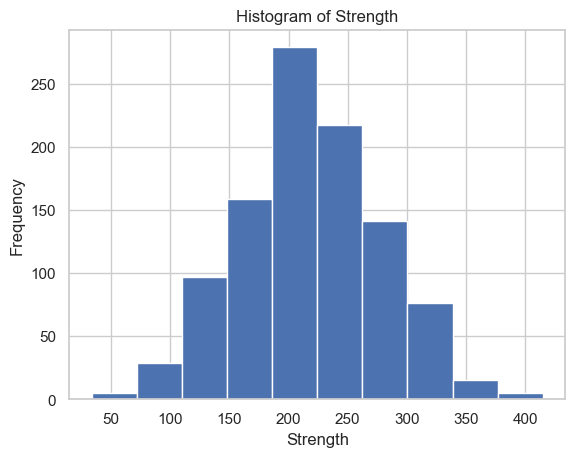

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('composite.csv')

print(df.head())
mean_strength = df['Strength'].mean()
print(f'Mean Strength: {mean_strength:.2f}')

plt.hist(df['Strength'], bins=10)
plt.xlabel('Strength')
plt.ylabel('Frequency')
plt.title('Histogram of Strength')
plt.show()

In [20]:
mean_weight = df['Weight'].mean()
std_weight = df['Weight'].std()

print(f'Mean Weight: {mean_weight:.2f}')
print(f'Standard Deviation of Weight: {std_weight:.2f}')

Mean Weight: 57.25
Standard Deviation of Weight: 12.33


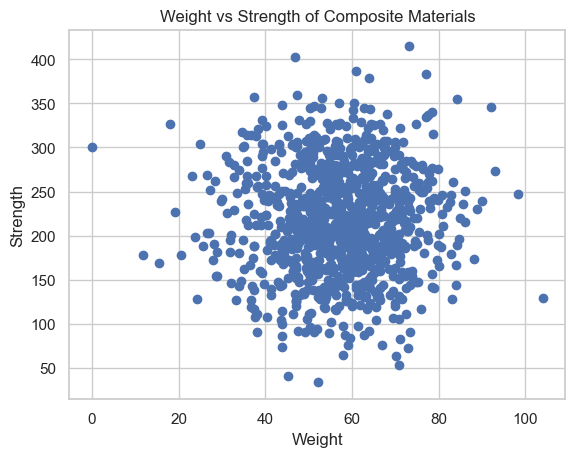

In [21]:
plt.scatter(df['Weight'], df['Strength'])
plt.xlabel('Weight')
plt.ylabel('Strength')
plt.title('Weight vs Strength of Composite Materials')
plt.show()

In [22]:
correlation = df['Weight'].corr(df['Strength'])

print(f'Correlation between Weight and Strength: {correlation:.2f}')

Correlation between Weight and Strength: 0.01


In [23]:
df['Strength Rank'] = df['Strength'].rank(ascending=False)

print(df[['Density, kg/m3', 'Strength', 'Strength Rank']])

     Density, kg/m3  Strength  Strength Rank
0.0      738.736842     220.0          496.5
1.0      738.736842     220.0          496.5
2.0      738.736842     220.0          496.5
3.0      738.736842     220.0          496.5
4.0      753.000000     220.0          496.5
..              ...       ...            ...
NaN             NaN       NaN            NaN
NaN             NaN       NaN            NaN
NaN             NaN       NaN            NaN
NaN             NaN       NaN            NaN
NaN             NaN       NaN            NaN

[1040 rows x 3 columns]


In [24]:
import seaborn as sns

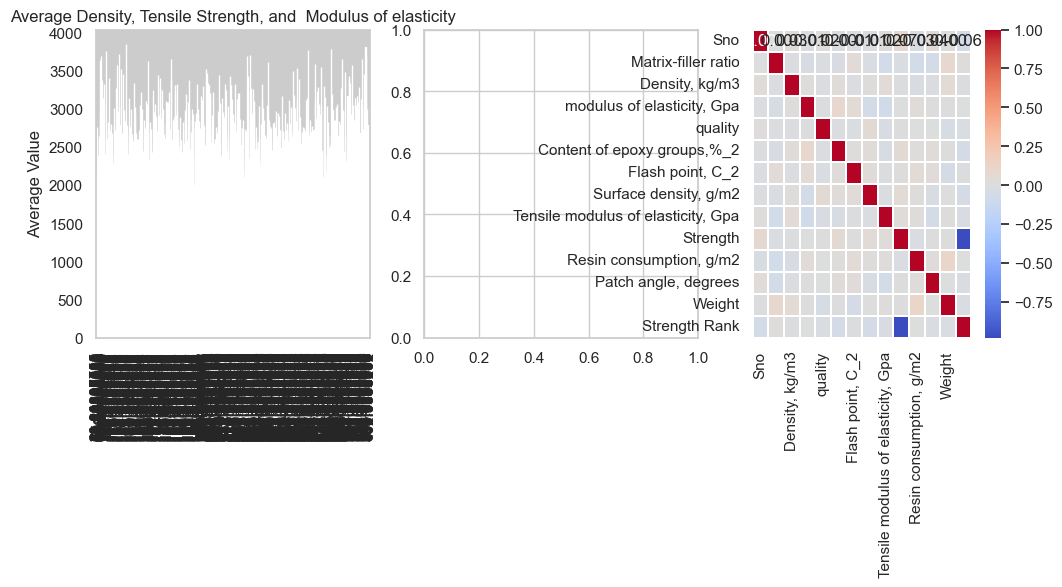

In [25]:
data=df
grouped = data.groupby(["Strength"]).mean()

sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
grouped[['Density, kg/m3', 'quality', 'Tensile modulus of elasticity, Gpa']].plot(kind="bar", ax=ax[0], legend=False)
ax[0].set_xlabel("")
ax[0].set_ylabel("Average Value")
ax[0].set_title("Average Density, Tensile Strength, and  Modulus of elasticity")

corr = data.corr()
sns.set(style="whitegrid")
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.05)
plt.show()

In [26]:
print(data.head())
missing_values = data.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

          Sno  Matrix-filler ratio  Density, kg/m3  \
0.0  1.857143               2030.0      738.736842   
1.0  1.857143               2030.0      738.736842   
2.0  1.857143               2030.0      738.736842   
3.0  1.857143               2030.0      738.736842   
4.0  2.771331               2030.0      753.000000   

     modulus of elasticity, Gpa    quality  Content of epoxy groups,%_2  \
0.0                       30.00  22.267857                   100.000000   
1.0                       50.00  23.750000                   284.615385   
2.0                       49.90  33.000000                   284.615385   
3.0                      129.00  21.250000                   300.000000   
4.0                      111.86  22.267857                   284.615385   

     Flash point, C_2  Surface density, g/m2  \
0.0             210.0                   70.0   
1.0             210.0                   70.0   
2.0             210.0                   70.0   
3.0             210.0           

In [27]:
data_filled_constant = data.fillna(0)
data_filled_mean = data.fillna(data.mean())
data_filled_median = data.fillna(data.median())
data_filled_ffill = data.fillna(method='ffill')
data_filled_bfill = data.fillna(method='bfill')
print("Data with missing values filled with a constant:")
print(data_filled_constant.head())
print("Data with missing values filled with mean:")
print(data_filled_mean.head())
print("Data with missing values filled with median:")
print(data_filled_median.head())
print("Data with missing values filled using forward fill:")
print(data_filled_ffill.head())
print("Data with missing values filled using backward fill:")
print(data_filled_bfill.head())

Data with missing values filled with a constant:
          Sno  Matrix-filler ratio  Density, kg/m3  \
0.0  1.857143               2030.0      738.736842   
1.0  1.857143               2030.0      738.736842   
2.0  1.857143               2030.0      738.736842   
3.0  1.857143               2030.0      738.736842   
4.0  2.771331               2030.0      753.000000   

     modulus of elasticity, Gpa    quality  Content of epoxy groups,%_2  \
0.0                       30.00  22.267857                   100.000000   
1.0                       50.00  23.750000                   284.615385   
2.0                       49.90  33.000000                   284.615385   
3.0                      129.00  21.250000                   300.000000   
4.0                      111.86  22.267857                   284.615385   

     Flash point, C_2  Surface density, g/m2  \
0.0             210.0                   70.0   
1.0             210.0                   70.0   
2.0             210.0          

C:\Users\Kishore\AppData\Local\Temp\ipykernel_8012\2201764625.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled_ffill = data.fillna(method='ffill')
C:\Users\Kishore\AppData\Local\Temp\ipykernel_8012\2201764625.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled_bfill = data.fillna(method='bfill')


In [28]:
print(data.head())
data_cleaned_rows = data.dropna()
data_cleaned_cols = data.dropna(axis=1)
print("Data with rows containing missing values removed:")
print(data_cleaned_rows.head())
print("Data with columns containing missing values removed:")
print(data_cleaned_cols.head())

          Sno  Matrix-filler ratio  Density, kg/m3  \
0.0  1.857143               2030.0      738.736842   
1.0  1.857143               2030.0      738.736842   
2.0  1.857143               2030.0      738.736842   
3.0  1.857143               2030.0      738.736842   
4.0  2.771331               2030.0      753.000000   

     modulus of elasticity, Gpa    quality  Content of epoxy groups,%_2  \
0.0                       30.00  22.267857                   100.000000   
1.0                       50.00  23.750000                   284.615385   
2.0                       49.90  33.000000                   284.615385   
3.0                      129.00  21.250000                   300.000000   
4.0                      111.86  22.267857                   284.615385   

     Flash point, C_2  Surface density, g/m2  \
0.0             210.0                   70.0   
1.0             210.0                   70.0   
2.0             210.0                   70.0   
3.0             210.0           

In [29]:
data_cleaned_rows_thresh = data.dropna(thresh=5)
data_cleaned_cols_thresh = data.dropna(axis=1, thresh=10)

In [30]:
print(data.head())
unique_values_column1 = data['Weight'].unique()
print("\nUnique values in column1:", unique_values_column1)

          Sno  Matrix-filler ratio  Density, kg/m3  \
0.0  1.857143               2030.0      738.736842   
1.0  1.857143               2030.0      738.736842   
2.0  1.857143               2030.0      738.736842   
3.0  1.857143               2030.0      738.736842   
4.0  2.771331               2030.0      753.000000   

     modulus of elasticity, Gpa    quality  Content of epoxy groups,%_2  \
0.0                       30.00  22.267857                   100.000000   
1.0                       50.00  23.750000                   284.615385   
2.0                       49.90  33.000000                   284.615385   
3.0                      129.00  21.250000                   300.000000   
4.0                      111.86  22.267857                   284.615385   

     Flash point, C_2  Surface density, g/m2  \
0.0             210.0                   70.0   
1.0             210.0                   70.0   
2.0             210.0                   70.0   
3.0             210.0           

In [31]:
print("Original Dataset:")
print(data.head())

pivot_data = data.pivot(index='Sno', columns='Density, kg/m3', values='Strength Rank')
print("\nReshaped Dataset using Pivot:")
print(pivot_data.head())

# Transposing Data
# Example: Transpose the dataset
transposed_data = data.T
print("\nTransposed Dataset:")
print(transposed_data.head())

Original Dataset:
          Sno  Matrix-filler ratio  Density, kg/m3  \
0.0  1.857143               2030.0      738.736842   
1.0  1.857143               2030.0      738.736842   
2.0  1.857143               2030.0      738.736842   
3.0  1.857143               2030.0      738.736842   
4.0  2.771331               2030.0      753.000000   

     modulus of elasticity, Gpa    quality  Content of epoxy groups,%_2  \
0.0                       30.00  22.267857                   100.000000   
1.0                       50.00  23.750000                   284.615385   
2.0                       49.90  33.000000                   284.615385   
3.0                      129.00  21.250000                   300.000000   
4.0                      111.86  22.267857                   284.615385   

     Flash point, C_2  Surface density, g/m2  \
0.0             210.0                   70.0   
1.0             210.0                   70.0   
2.0             210.0                   70.0   
3.0           

ValueError: Index contains duplicate entries, cannot reshape

In [ ]:
data1 = pd.read_csv("composite.csv")
data2 = pd.read_csv("data_Y.csv")

print("Data 1:")
print(data1.head())

print("\nData 2:")
print(data2.head())
merged_data = pd.merge(data1, data2, on='quality')
print("\nMerged Dataset:")
print(merged_data.head())

In [ ]:
df = pd.read_csv('composite.csv')
missing_values = df.isnull().sum()
data = df.fillna(data.mean())
duplicate_entries = data.duplicated().sum()
data = df.drop_duplicates()
data.describe()
data.info()